# Regularization (L1, L2)


**Regularization**  is a technique used in machine learning to prevent **overfitting**.
 
 * Overfitting happens when a model learns the training data too well, including the noise and outliers, which causes it to perform poorly on new data.
 
 * In simple terms, regularization **adds a penalty to the model for being too complex, encouraging it to stay simpler and more general**.
 * This way, it’s less likely to make extreme predictions based on the noise in the data.

| Type            | Also Known As     | Penalty Term              | Effect on Weights                                             | Use Case                                            |
|-----------------|------------------|----------------------------|----------------------------------------------------------------|-----------------------------------------------------|
| **L1**          | Lasso Regression  |   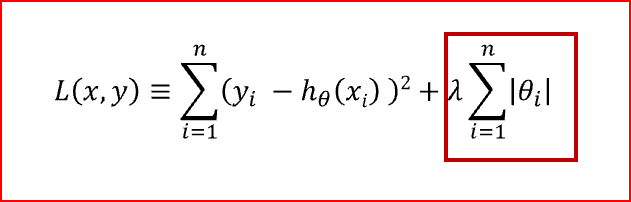            | Shrinks some weights to **zero**, performing **feature selection** | When you want a **sparse model** (fewer features)  |
| **L2**          | Ridge Regression  |     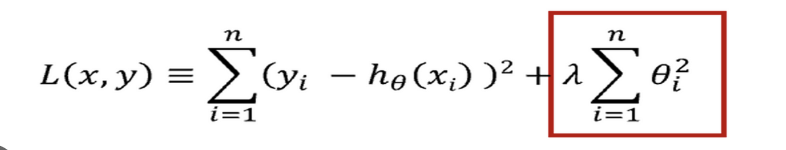          | Shrinks weights smoothly but **doesn't eliminate** them         | When **all features are important**, but regularization is needed |
| **ElasticNet**  | L1 + L2 Combined  | 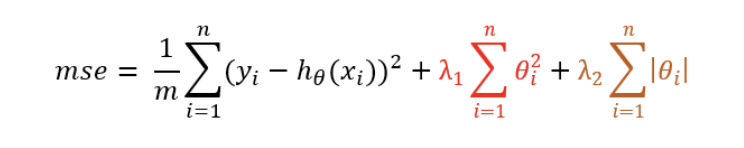 | Combines both L1 and L2 for balanced shrinkage and selection    | When both **sparsity** and **stability** are needed |


## L1 Regularization (Lasso Regression)

L1 regularization, also known as LASSO (Least Absolute Shrinkage and Selection Operator), is a technique used in machine learning and statistics to:

 * Perform feature selection

 * Encourage sparsity in the model

 * Handle collinearity among features
 * Promote model simplification

#### Mathematical Formulation

  * L1 regularization can be applied to various loss functions (e.g., residual sum of squares, binary cross-entropy). For illustration, we use the Mean Squared Error (MSE):

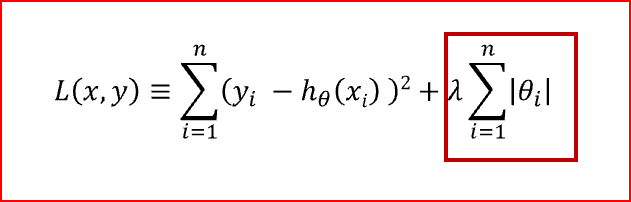



#### Effect of Regularization Strength λ

* when λ = 0 L1 regularization becomes standard **Ordinary Least Squares (OLS) regressio**n**.

* as λ increases, the **penalty for larger coefficients increases**, encouraging many coefficients to shrink to zero.

* At very high λ, the model becomes overly simple, possibly underfitting the data.

### Choosing λ: Cross-Validation

The optimal value of λ is usually selected using k-fold cross-validation, where:

 * The dataset is divided into k equal parts.

 * Each fold serves once as a validation set while the rest are used for training.
Model performance (e.g., using Mean Squared Error) is averaged across all folds.

 * The λ that gives the best average performance is selected.

### Advantages of L1 Regularization

* **Feature Selection**	Drives coefficients of less important features to zero, keeping only the relevant ones.

* **Sparsity**	Leads to models with fewer non-zero weights, improving computational efficiency and interpretability.

* **Handles Collinearity**	When features are correlated, L1 tends to keep only one of them in the model.

* **Model Simplification**	The final model is simpler, more generalized, and easier to explain.

---

## L2 Regularization (Ridge Regression)

L2 regularization, also known as Ridge Regression, is widely used to:

 * Retain all features (feature maintenance)

 * Improve model stability
 * Handle collinearity effectively

### Mathematical Formulation

L2 regularization can be applied to various loss functions (e.g., Residual Sum of Squares, Binary Cross-Entropy). For simplicity, we’ll use the MSE:

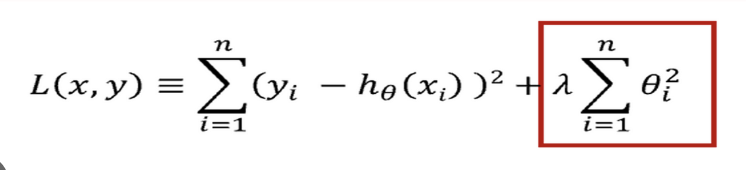


### Effect of λ (Regularization Strength)

* λ=0: Reduces to standard **Ordinary Least Squares (OLS)**.

* As λ increases, the coefficients shrink towards smaller, non-zero values.

* Unlike L1, coefficients in L2 rarely shrink exactly to zero, preserving all features but reducing their magnitude.

### Why Use a Squared Penalty?

 * The squared penalty encourages smoother models by penalizing larger coefficients more heavily.
 
 * Helps reduce the influence of outliers and noise, enhancing stability.
 * Promotes smaller, more consistent coefficient values rather than sparse solutions.

### Choosing λ: Cross-Validation
Optimal selection of λ is typically achieved using k-fold cross-validation:

* Split the dataset into k equal parts.

* For each fold, use one as the validation set and the rest for training.

* Measure performance (e.g., MSE) on each fold.
* Average the results and pick the λ that gives the best generalization performance.

### Advantages of L2 Regularization

* **Feature Retention**	Keeps all features in the model (no sparsity), useful when all predictors are relevant.

* **Stability**	Reduces variance by shrinking coefficients. Small coefficient values lead to less sensitivity to input changes, stabilizing model predictions.

* **Collinearity Handling**	Correlated features are given similar, balanced weights rather than eliminating any, preserving information while avoiding bias.


---


## Elastic Net Regularization

Elastic Net is a regularization technique that combines both L1 (Lasso) and L2 (Ridge) penalties in a single model. It is particularly useful when dealing with high-dimensional data and correlated features.


* Elastic Net is designed to overcome the limitations of using L1 or L2 alone:

  * **L1 (Lasso)** tends to select only one variable from a group of highly correlated variables and ignore the others.
  
  * **L2 (Ridge)** keeps all variables but doesn’t perform feature selection.
Elastic Net brings the best of both worlds — it can select variables like Lasso and stabilize coefficients like Ridge.

### Mathematical Formulation

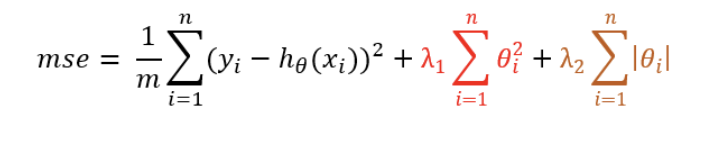

### How Elastic Net Works

 * **Encourages sparsity (via L1):** Drives some coefficients to zero, helping with feature selection.
 
 * **Maintains stability (via L2):** Keeps correlated predictors with similar weights, instead of dropping them.

### When to Use Elastic Net

  * **High-dimensional data (p > n):** Where the number of features exceeds the number of observations.

  * **Multicollinearity:** When predictors are highly correlated.
Model interpretation and performance: When you want a balance between interpretability and prediction accuracy.

### Advantages of Elastic Net

* **Combines L1 & L2**	Offers a flexible regularization framework that leverages both sparsity and stability.

* **Better with Correlated Features**	Unlike Lasso, Elastic Net can include groups of correlated features instead of picking just one.

* **Improved Generalization**	Reduces overfitting by applying shrinkage and selection, enhancing model robustness.

---

## Example:

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We are going to use Melbourne House Price Dataset where we'll predict House Predictions based on various features.



In [2]:
# read dataset
dataset = pd.read_csv('./Melbourne_housing_FULL.csv')

In [3]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [5]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [6]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [10]:
dataset.shape


(34857, 15)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Method         34857 non-null  object 
 4   SellerG        34857 non-null  object 
 5   Regionname     34854 non-null  object 
 6   Propertycount  34854 non-null  float64
 7   Distance       34856 non-null  float64
 8   CouncilArea    34854 non-null  object 
 9   Bedroom2       26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13742 non-null  float64
 14  Price          27247 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 4.0+ MB


In [12]:
# check for nan values

dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [ ]:
# handle missing values


# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [ ]:
# Drop NA values of Price, since it's our predictive variable we won't impute it
dataset.dropna(inplace=True)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27244 entries, 1 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27244 non-null  object 
 1   Rooms          27244 non-null  int64  
 2   Type           27244 non-null  object 
 3   Method         27244 non-null  object 
 4   SellerG        27244 non-null  object 
 5   Regionname     27244 non-null  object 
 6   Propertycount  27244 non-null  float64
 7   Distance       27244 non-null  float64
 8   CouncilArea    27244 non-null  object 
 9   Bedroom2       27244 non-null  float64
 10  Bathroom       27244 non-null  float64
 11  Car            27244 non-null  float64
 12  Landsize       27244 non-null  float64
 13  BuildingArea   27244 non-null  float64
 14  Price          27244 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 3.3+ MB


In [18]:
# Let's one hot encode the categorical features


dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [19]:
# Let's bifurcate our dataset into train and test dataset

X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [ ]:
# splitting the dataset into training and testing

# we will use 70% of the data for training and 30% for testing
# we will use random_state=2 to get the same results every time we run the code

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

In [22]:
# linear regression


from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

In [ ]:
# score the model on test data

reg.score(test_X, test_y)

0.1385368316158102

In [24]:
# score the model on train data
reg.score(train_X, train_y)

0.6827792395792723

**Here training score is 68% but test score is 13.85% which is very low** --> Overfitting

### Using Lasso (L1 Regularized) Regression Model

In [25]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [26]:
lasso_reg.score(test_X, test_y)

0.6636111369404489

In [27]:
lasso_reg.score(train_X, train_y)

0.6766985624766824

### Using Ridge (L2 Regularized) Regression Model

In [28]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [29]:
ridge_reg.score(test_X, test_y)

0.6670848945194977

In [30]:
ridge_reg.score(train_X, train_y)

0.662237673968433

We see that **Lasso and Ridge Regularizations** prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too